# Homework 3, Machine Learning
## Joshua Schaaf

### Imports

In [83]:
import pandas as pd
import numpy as np
import sympy as sp
from sympy.solvers import solve
from sympy.plotting import plot

### Code

#### Problem 1

#### a) Derive analytically x\* that satisfies ∇f(x) = 0. Is there a unique solution for x\*?

In [2]:
x1, x2 = sp.Symbol('x1'), sp.Symbol('x2') # making symbols x1 and x2
f = 3*x1**2+2*x2**2+4*x1*x2-5*x1+6 # making the function
f

3*x1**2 + 4*x1*x2 - 5*x1 + 2*x2**2 + 6

In [3]:
x1_diff, x2_diff = sp.diff(f, x1), sp.diff(f, x2) # getting the partial derivatives
grad = sp.Matrix(((x1_diff), (x2_diff))) # making the gradient
grad

Matrix([
[6*x1 + 4*x2 - 5],
[    4*x1 + 4*x2]])

In [4]:
solution = sp.solve(grad) # solving the system of equations 
x1_soln, x2_soln = solution[x1], solution[x2] # getting x1 and x2 solutions
x_star = sp.Matrix(((x1_soln), (x2_soln))) # making the solution 'pretty' (2.5 for x1, -2.5 for x2)
x_star

Matrix([
[ 5/2],
[-5/2]])

#### ANSWER a) There is unique solution for x*, with x1 being 2.5, and x2 being -2.5 where ∇f(x) = 0

#### b) Is x\* minimum or maximum of f(x)? (Help: a symmetric matrix A is positive definite if all its principal minors have strictly positive determinants)
It is in positive quadratic form, so when the gradient = 0, it is the minimum.

#### c) Derive gradient descent iteration formula for finding x*

In [52]:
alpha=0.1
x_star = np.array([0, 0])
for i in range(1000):
    x_star = x_star-alpha*np.array([grad[0].subs({x1: x_star[0], x2:x_star[1]}), grad[1].subs({x1: x_star[0], x2:x_star[1]})])
x_star

array([2.50000000000000, -2.50000000000000], dtype=object)

---
Not done

#### d) Implement the gradient descent procedure derived in 1c in Python.

In [62]:
alphas = {0.0001, 0.001, 0.001, 0.01, 0.1, 1, 10}
def gd_hw3(f, alpha, x_star=np.array([0,0]),iter = 1000):
    x_star_evolution = []
    x1_diff, x2_diff = sp.diff(f, x1), sp.diff(f, x2) # getting the partial derivatives
    grad = sp.Matrix(((x1_diff), (x2_diff))) # making the gradient
    x_star_evolution.append(list(x_star))
    for _ in range(iter):
        x_star = x_star-alpha*np.array([grad[0].subs({x1: x_star[0], x2:x_star[1]}), grad[1].subs({x1: x_star[0], x2:x_star[1]})])
        x_star_evolution.append(list(x_star))
    return x_star_evolution

In [63]:
alpha_dict = {}
for alpha in alphas:
    alpha_dict[alpha] = gd_hw3(f, alpha)

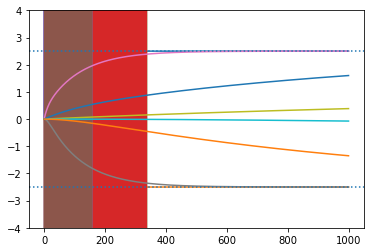

In [77]:
import matplotlib.pyplot as plt
for key in alpha_dict.keys():
    plt.ylim([-4, 4])
    plt.plot(alpha_dict[key])
plt.axhline(y=2.5, linestyle='dotted')
plt.axhline(y=-2.5, linestyle='dotted')

Plot the evolution of x for all different choices of alpha in the same figure. Discuss the influence of alpha on the convergence. How close were the final solutions to the x\* obtained in (1a)?

---
not done

#### Problem 2

You are given a function f(x) = sin(x) + 0.3x
#### a. Plot function f(x) in the range x = [-10, 10]. How many points satisfy fʹ’(x) = 0?

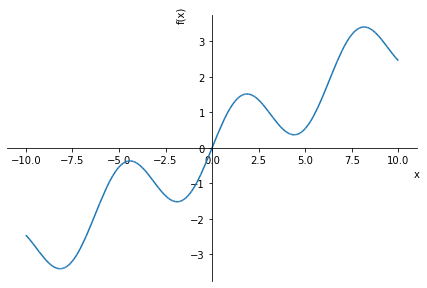

In [84]:
x = sp.Symbol('x')
f2 = sp.sin(x) + 0.3*x
f2_diff = sp.diff(f2)
plot(f2)

#### ANSWER A) There are 6 points that satisfy f'(x) = 0 in the range x = [-10, 10]

#### b. Derive gradient descent iteration formula for finding a (local) minimum of f(x).

In [86]:
alpha=0.1
x_star = 0
for i in range(1000):
    x_star = x_star-alpha*f2_diff.subs({x:x_star})
x_star

-1.87548898081029

#### c. Implement the gradient descent procedure derived in (2b) in Python. (Hint: You should write a Python function “xfinal= gd_hw3_2(x0, alpha, iter)”). Explore results of gradient descent procedure for different choices of x0 and alpha (keep the number of iterations to iter = 1000). Summarize your conclusions briefly (you could use one or two figures to illustrate the main points).

In [128]:
alphas = {0.0001, 0.001, 0.001, 0.01, 0.1, 1, 10}
x0 = list(range(-20, 21))
def gd_hw3_2(f, alpha, x_star, iter = 1000):
    x_star = float(x_star)
    x_star_evolution = []
    f_diff = sp.diff(f)
    x_star_evolution.append(x_star)
    for _ in range(iter):
        x_star = x_star - alpha*f_diff.subs(x, x_star)
        x_star_evolution.append(x_star)
    return x_star_evolution

In [121]:
alpha_dict_2 = {}
for alpha in alphas:
    alpha_dict_2[alpha] = gd_hw3_2(f2, alpha, 0)

In [129]:
x_star_dict = {}
for x_star in x0:
    x_star_dict[x_star] = gd_hw3_2(f2, 0.01, x_star)

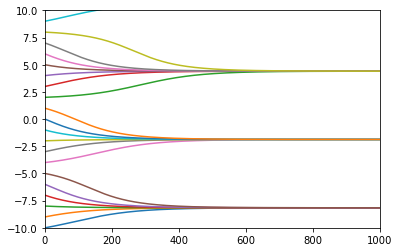

In [133]:
import matplotlib.pyplot as plt
for key in x_star_dict.keys():
    plt.ylim([-10, 10])
    plt.xlim([0, 1000])
    plt.plot(x_star_dict[key])

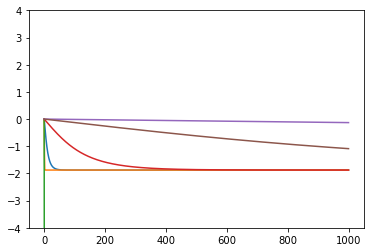

In [123]:
import matplotlib.pyplot as plt
for key in alpha_dict_2.keys():
    plt.ylim([-4, 4])
    plt.plot(alpha_dict_2[key])